In [1]:
include("preamble.jl")

/Users/angus2/Documents/SFFMProject/DFQExamples.jl/notebooks


  Activating environment at `~/Documents/SFFMProject/DFQExamples.jl/Project.toml`


Precompiling project...


  ✓ DiscretisedFluidQueues


1 dependency successfully precompiled in 8 seconds (138 already precompiled)


Path `/Users/angus2/Documents/SFFMProject/DFQExamples.jl/notebooks/../../DiscretisedFluidQueues` exists and looks like the correct package. Using existing path.
   Resolving package versions...


  No Changes to `~/Documents/SFFMProject/DFQExamples.jl/Project.toml`
  No Changes to `~/Documents/SFFMProject/DFQExamples.jl/Manifest.toml`


In [2]:
T = Matrix([0.0]')
c = [1.0]
model = FluidQueue(T,c)

nodes = collect(0.0:0.5:5);

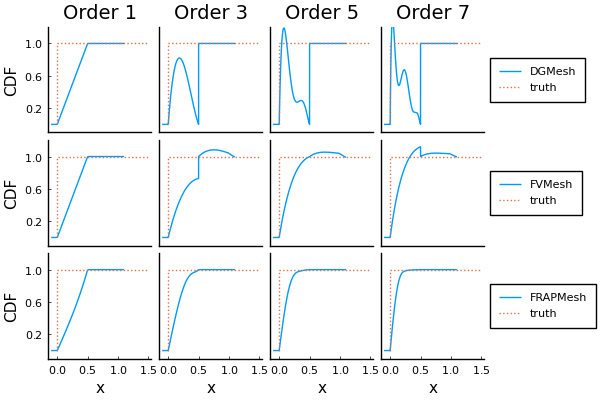

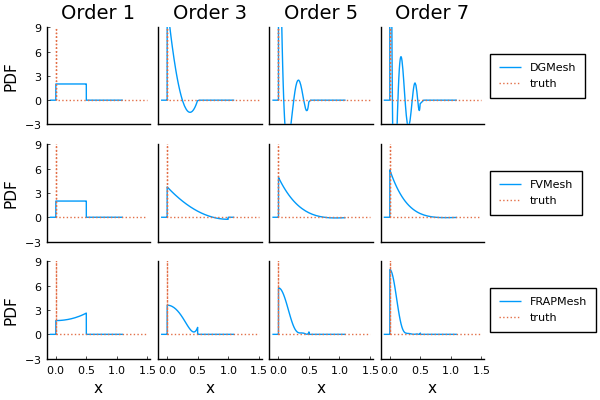

In [3]:

for plt_type in (cdf,pdf)
    p = plot(layout=(3,4))
    linetypes = [:solid,:solid,:solid]
    c_order = 0
    for order in 1:2:7
        c_order += 1
        c_mesh = 0
        for mtype in (DGMesh, FVMesh, FRAPMesh)
            c_mesh += 1
            mesh = mtype(nodes,order)

            dq = DiscretisedFluidQueue(model,mesh)

            d0 = interior_point_mass(eps(),1,dq)

            rec = plt_type(d0)
            
            std_plot(args...; kwargs...) = plot!(
                p.layout.grid[c_mesh,c_order],
                x->rec(x,1),
                nodes[1]-0.1, 1.1;
                ylim=((plt_type==pdf) ? (-3,9) : (-0.1,1.2)),
                linestyle=linetypes[c_mesh],
                xticks=false,
                yticks=false,
                grid=false,
                kwargs...,
            )
            if c_order == 1
                std_plot(;label=false,ylabel=uppercase(string(plt_type)),legend=false)
                yticks!(p.layout.grid[c_mesh,c_order], ((plt_type==pdf) ? (-3:3:9) : (-0.2:0.4:1.2)))
            elseif c_order == 4
                std_plot(;label=string(mtype),legend=:outerright)
            else
                std_plot(;label=false,legend=false)
            end
            if c_mesh == 1 
                plot!(p.layout.grid[c_mesh,c_order]; title="Order "*string(order))
            elseif c_mesh == 3
                xticks!(p.layout.grid[c_mesh,c_order], 0:0.5:1.5)
                plot!(p.layout.grid[c_mesh,c_order]; xlabel="x")
            end
            std_plot2(args... ; kwargs...) = if plt_type==cdf
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    [0.0;eps();eps();1.5],
                    [0.0;0.0;1.0;1.0],
                    args...;
                    linestyle=:dot,
                    kwargs...,
                )
            elseif plt_type==pdf
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    [0.0;eps();2*eps();1.5],
                    [0.0;100;0.0;0.0],
                    args...;
                    subplot=c_order,
                    linestyle=:dot,
                    kwargs...
                )
            end
            if c_order==4
                std_plot2(;label="truth",legend=:outerright)
            else
                std_plot2(;label=false)
            end
        end
    end
    display(p)
end

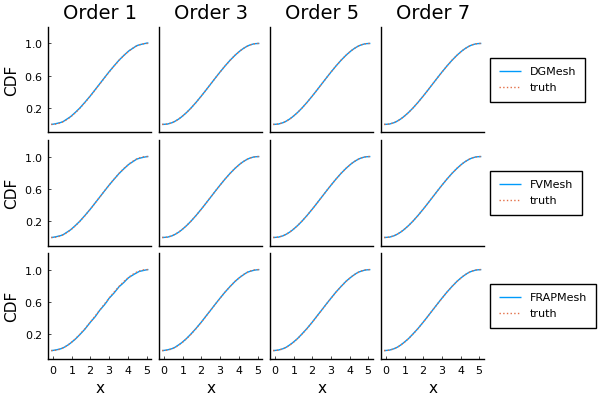

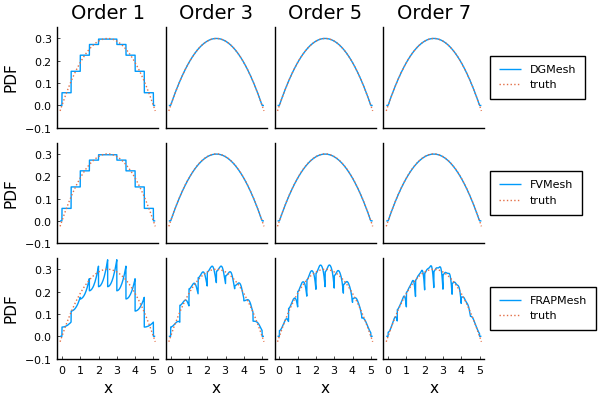

In [4]:

for plt_type in (cdf,pdf)
    p = plot(layout=(3,4))
    linetypes = [:solid,:solid,:solid]
    c_order = 0
    for order in 1:2:7
        c_order += 1
        c_mesh = 0
        for mtype in (DGMesh, FVMesh, FRAPMesh)
            c_mesh += 1
            mesh = mtype(nodes,order)

            dq = DiscretisedFluidQueue(model,mesh)

            f(x,i) = (2.5^2-(x-2.5)^2)/(125/6)
            d0 = SFMDistribution(f,dq)

            rec = plt_type(d0)
            
            std_plot(args...; kwargs...) = plot!(
                p.layout.grid[c_mesh,c_order],
                x->rec(x,1),
                nodes[1]-0.1, 5.1;
                ylim=((plt_type==pdf) ? (-0.1,0.35) : (-0.1,1.2)),
                linestyle=linetypes[c_mesh],
                xticks=false,
                yticks=false,
                grid=false,
                kwargs...,
            )
            if c_order == 1
                std_plot(;label=false,ylabel=uppercase(string(plt_type)),legend=false)
                yticks!(p.layout.grid[c_mesh,c_order], ((plt_type==pdf) ? (-0.1:0.1:0.35) : (-0.2:0.4:1.2)))
            elseif c_order == 4
                std_plot(;label=string(mtype),legend=:outerright)
            else
                std_plot(;label=false,legend=false)
            end
            if c_mesh == 1 
                plot!(p.layout.grid[c_mesh,c_order]; title="Order "*string(order))
            elseif c_mesh == 3
                xticks!(p.layout.grid[c_mesh,c_order], 0:1:5)
                plot!(p.layout.grid[c_mesh,c_order]; xlabel="x")
            end
            std_plot2(args... ; kwargs...) = if plt_type==cdf
                int_f(x) = (0<x<5)*(5*x^2/2-x^3/3)/(125/6) + (x>=5)
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    x->int_f(x),
                    nodes[1]-0.1, 5.1,
                    args...;
                    linestyle=:dot,
                    kwargs...,
                )
            elseif plt_type==pdf
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    x->f(x,1),
                    nodes[1]-0.1, 5.1, 
                    args...;
                    subplot=c_order,
                    linestyle=:dot,
                    kwargs...
                )
            end
            if c_order==4
                std_plot2(;label="truth",legend=:outerright)
            else
                std_plot2(;label=false)
            end
        end
    end
    display(p)
end

1×11 SFMDistribution{DGMesh}:
 2.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

1×6 SFMDistribution{FVMesh}:
 1.0  0.0  0.0  0.0  0.0  0.0

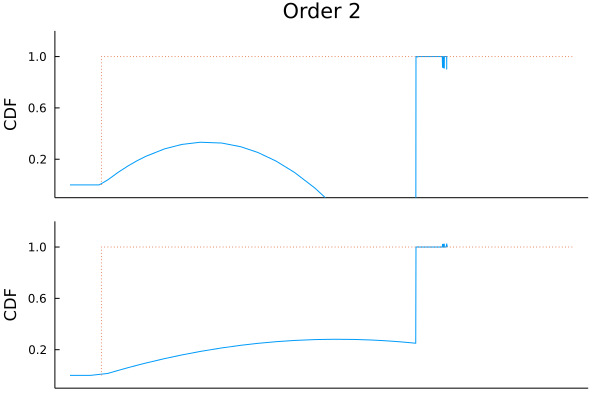

1×11 SFMDistribution{DGMesh}:
 2.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

1×6 SFMDistribution{FVMesh}:
 1.0  0.0  0.0  0.0  0.0  0.0

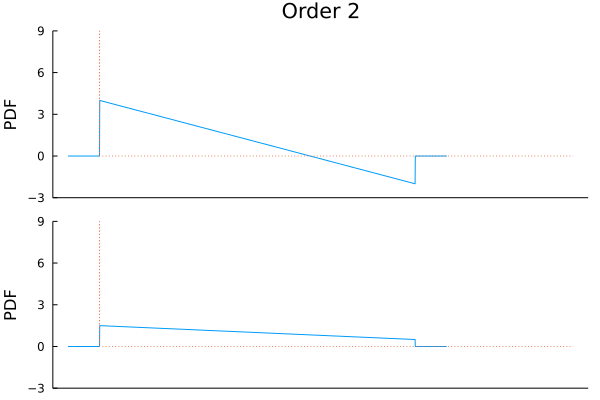

In [4]:
nodes = collect(0.0:1.0:5);
for plt_type in (cdf,pdf)
    p = plot(layout=(2,1))
    linetypes = [:solid,:solid,:solid]
    c_order = 0
    for order in [2]
        c_order += 1
        c_mesh = 0
        for mtype in (DGMesh, FVMesh)
            c_mesh += 1
            mesh = mtype(nodes,order)

            dq = DiscretisedFluidQueue(model,mesh)

            d0 = interior_point_mass(eps(),1,dq)
            display(d0)
            rec = plt_type(d0)

            

            
            std_plot(args...; kwargs...) = plot!(
                p.layout.grid[c_mesh,c_order],
                x->rec(x,1),
                nodes[1]-0.1, 1.1;
                ylim=((plt_type==pdf) ? (-3,9) : (-0.1,1.2)),
                linestyle=linetypes[c_mesh],
                xticks=false,
                yticks=false,
                grid=false,
                kwargs...,
            )
            if c_order == 1
                std_plot(;label=false,ylabel=uppercase(string(plt_type)),legend=false)
                yticks!(p.layout.grid[c_mesh,c_order], ((plt_type==pdf) ? (-3:3:9) : (-0.2:0.4:1.2)))
            elseif c_order == 4
                std_plot(;label=string(mtype),legend=:outerright)
            else
                std_plot(;label=false,legend=false)
            end
            if c_mesh == 1 
                plot!(p.layout.grid[c_mesh,c_order]; title="Order "*string(order))
            elseif c_mesh == 3
                xticks!(p.layout.grid[c_mesh,c_order], 0:0.5:1.5)
                plot!(p.layout.grid[c_mesh,c_order]; xlabel="x")
            end
            std_plot2(args... ; kwargs...) = if plt_type==cdf
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    [0.0;eps();eps();1.5],
                    [0.0;0.0;1.0;1.0],
                    args...;
                    linestyle=:dot,
                    kwargs...,
                )
            elseif plt_type==pdf
                plot!(
                    p.layout.grid[c_mesh,c_order],
                    [0.0;eps();2*eps();1.5],
                    [0.0;100;0.0;0.0],
                    args...;
                    subplot=c_order,
                    linestyle=:dot,
                    kwargs...
                )
            end
            if c_order==4
                std_plot2(;label="truth",legend=:outerright)
            else
                std_plot2(;label=false)
            end
        end
    end
    display(p)
end